<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/master/Architectural%20Basics/DNN_All_Iterations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Architectural Basics**
##**Building a deep Neural network**

In this notebook, let's see how to build a neural network from scratch for MNIST image classification and how we can tune our architecture to optimize our network better step by step.  



**Import Libraries and Modules**

In [1]:
# https://keras.io/
# Importing Keras library
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np
# Importing Keras classes used for building CNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
# Importing Keras Inbuilt dataset
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


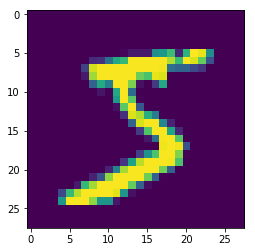

In [4]:
print (X_train.shape)
#Visualize one image in training set
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

### Preprocessing data

In [0]:
#Reshaping to hold the no of channels
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#Data converted to float and performed Image standardization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
#Train Labels
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

**One Hot Encoding**



In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
#Train Labels after one hot encoding, for example 5 is converted as [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#**Iteration 1**
##**How we define a vanila neural network for our classification problem**

**Convolution Blocks & Transition Blocks**
*   We will start building our network by deciding how many convolution blocks we need based on our input image size and the size of the object we are trying to predict in the image
*   And we will decide where we will place our transition blocks (Max pooling and 1x1 block) in our architecture
*   We will have convolution blocks followed by transition blocks till we reach our recptive field. 

**Kernels**
*   We will decide the number of kernels used 
*   We keep increasing our no of kernels until we perform max pooling followed by pointwise convolution

**Max Pooling**
*   We make sure max pooling is 2 or more layers away from output





In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, (3, 3), activation='relu', input_shape=(28,28,1))) # 26

model.add(Convolution2D(16, (3, 3), activation='relu')) # 24
model.add(Convolution2D(32, (3, 3), activation='relu')) # 22

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(16, (1, 1), activation='relu')) # 11

model.add(Convolution2D(16, (3, 3), activation='relu')) # 9
model.add(Convolution2D(16, (3, 3), activation='relu')) # 7
model.add(Convolution2D(16, (3, 3), activation='relu'))#5

model.add(Convolution2D(16, 1, activation='relu')) #5
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 16)        528       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 9, 9, 16)          2320      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 16)          2320      
__________

In [16]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Epoch 1/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.3662 - acc: 0.8816
Epoch 2/30
60000/60000 [==============================] - 6s 108us/step - loss: 0.0945 - acc: 0.9714
Epoch 3/30
60000/60000 [==============================] - 7s 108us/step - loss: 0.0688 - acc: 0.9785
Epoch 4/30
60000/60000 [==============================] - 7s 112us/step - loss: 0.0584 - acc: 0.9819
Epoch 5/30
60000/60000 [==============================] - 7s 123us/step - loss: 0.0479 - acc: 0.9853
Epoch 6/30
60000/60000 [==============================] - 7s 120us/step - loss: 0.0425 - acc: 0.9867
Epoch 7/30
60000/60000 [==============================] - 7s 123us/step - loss: 0.0381 - acc: 0.9883
Epoch 8/30
60000/60000 [==============================] - 7s 123us/step - loss: 0.0355 - acc: 0.9887
Epoch 9/30
60000/60000 [==============================] - 7s 123us/step - loss: 0.0306 - acc: 0.9902
Epoch 10/30
60000/60000 [==============================] - 7s 123us/step - loss: 0.0274 - a

## Observation

Achieved Validation Accuracy: 98.85, but Training Accuracy was 99.68.

Model seems to overfit the training data.

Few regularizations and batch normalization could be introduced to generalize the data better

#**Iteration 2**
##**Improvement**

*   Batch Normalization
    - We have standardized our inputs by dividing it by 255, but when we are convolving the values again in our network, we are getting values which are not ranging from 0 to 1. Different layers are getting values in different range. So its better to introduce Batch normalization after we perform our convolution each time.
    
    - Moreover during backpropagation, neural networks can be generalized better when the distribution of values are normalized.
     


In [17]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, (3, 3), activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, (3, 3), activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(32, (3, 3), activation='relu')) # 22
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(16, (1, 1), activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(16, (3, 3), activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(16, (3, 3), activation='relu')) # 7
model.add(BatchNormalization())
model.add(Convolution2D(16, (3, 3), activation='relu')) # 5
model.add(BatchNormalization())

model.add(Convolution2D(16, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

W0827 13:33:20.656445 140047146592128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



In [0]:
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, epochs=30, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=30, verbose=1)

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

##Observation:


1.   Adding Batch Normalization increases the accuracy meanwhile it increases the epoch time
2.   But the gap between the test accuracy(99.31) and train accuracy(99.72) is more



#**Iteration 3**
##**Improvements**

*  Adding Dropout


In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(10, 1, activation='relu')) #7

model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, nb_epoch=30, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

**Iteration 4**

In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) #24

model.add(MaxPooling2D(pool_size=(2, 2)))#12

model.add(Convolution2D(16, 3, 3, activation='relu'))#10
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#8
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#6
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#4
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))

model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
#def scheduler(epoch, lr):
#  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
#, callbacks=[LearningRateScheduler(scheduler, verbose=1)]

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, Y_test))

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)